In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score


In [2]:
df = pd.read_csv('three_hour_data.csv')
df.head()

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,WindEquipmentChangeDate
0,72518014735,2015-01-01T01:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.09,8,46,30.05,29.72,9.94,18,150,10,9/8/2006
1,72518014735,2015-01-01T04:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.02,6,57,30.03,29.7,9.94,16,190,7,9/8/2006
2,72518014735,2015-01-01T07:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,-0.02,1,52,30.05,29.72,9.94,17,160,9,9/8/2006
3,72518014735,2015-01-01T10:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,-0.01,3,44,30.06,29.72,9.94,21,180,11,9/8/2006
4,72518014735,2015-01-01T13:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.11,8,38,29.95,29.62,9.94,23,170,15,9/8/2006


In [3]:
df.shape

(20843, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20843 entries, 0 to 20842
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   STATION                    20843 non-null  int64  
 1   DATE                       20843 non-null  object 
 2   REPORT_TYPE                20843 non-null  object 
 3   SOURCE                     20843 non-null  int64  
 4   BackupElements             20843 non-null  object 
 5   BackupElevation            20843 non-null  int64  
 6   BackupEquipment            20843 non-null  object 
 7   BackupLatitude             20843 non-null  float64
 8   BackupLongitude            20843 non-null  float64
 9   BackupName                 20843 non-null  object 
 10  HourlyDewPointTemperature  20843 non-null  object 
 11  HourlyDryBulbTemperature   20843 non-null  object 
 12  HourlyPressureChange       20843 non-null  float64
 13  HourlyPressureTendency     20843 non-null  int

In [5]:
df.describe()

,STATION,SOURCE,BackupElevation,BackupLatitude,BackupLongitude,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed
count,2.084300e+04,20843.0,20843.0,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000
mean,7.251801e+10,4.0,260.0,42.689777,-73.828305,0.001490,4.907835,66.611524,9.228507,44.113611,178.702682,7.637864
std,0.000000e+00,0.0,0.0,0.004166,0.005734,0.049271,2.762154,18.291543,2.122013,17.775246,120.209434,5.768944
min,7.251801e+10,4.0,260.0,42.681200,-73.831090,-0.320000,1.000000,9.000000,0.060000,-14.000000,0.000000,0.000000
25%,7.251801e+10,4.0,260.0,42.691800,-73.831090,-0.030000,3.000000,53.000000,9.940000,31.000000,40.000000,3.000000
50%,7.251801e+10,4.0,260.0,42.691800,-73.831090,0.000000,5.000000,67.000000,9.940000,44.000000,180.000000,7.000000
75%,7.251801e+10,4.0,260.0,42.691800,-73.831090,0.030000,8.000000,81.000000,9.940000,60.000000,290.000000,11.000000
max,7.251801e+10,4.0,260.0,42.691800,-73.816500,0.310000,9.000000,100.000000,9.940000,80.000000,360.000000,38.000000


In [6]:
df.dropna(inplace=True)

In [7]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 STATION                      0
DATE                         0
REPORT_TYPE                  0
SOURCE                       0
BackupElements               0
BackupElevation              0
BackupEquipment              0
BackupLatitude               0
BackupLongitude              0
BackupName                   0
HourlyDewPointTemperature    0
HourlyDryBulbTemperature     0
HourlyPressureChange         0
HourlyPressureTendency       0
HourlyRelativeHumidity       0
HourlySeaLevelPressure       0
HourlyStationPressure        0
HourlyVisibility             0
HourlyWetBulbTemperature     0
HourlyWindDirection          0
HourlyWindSpeed              0
WindEquipmentChangeDate      0
dtype: int64


In [8]:
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: 0


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.nunique()

STATION                          1
DATE                         20843
REPORT_TYPE                      1
SOURCE                           1
BackupElements                   1
BackupElevation                  1
BackupEquipment                  1
BackupLatitude                   2
BackupLongitude                  2
BackupName                       1
HourlyDewPointTemperature      102
HourlyDryBulbTemperature       109
HourlyPressureChange            58
HourlyPressureTendency           9
HourlyRelativeHumidity          88
HourlySeaLevelPressure         182
HourlyStationPressure          173
HourlyVisibility                19
HourlyWetBulbTemperature        93
HourlyWindDirection             37
HourlyWindSpeed                 29
WindEquipmentChangeDate          1
dtype: int64

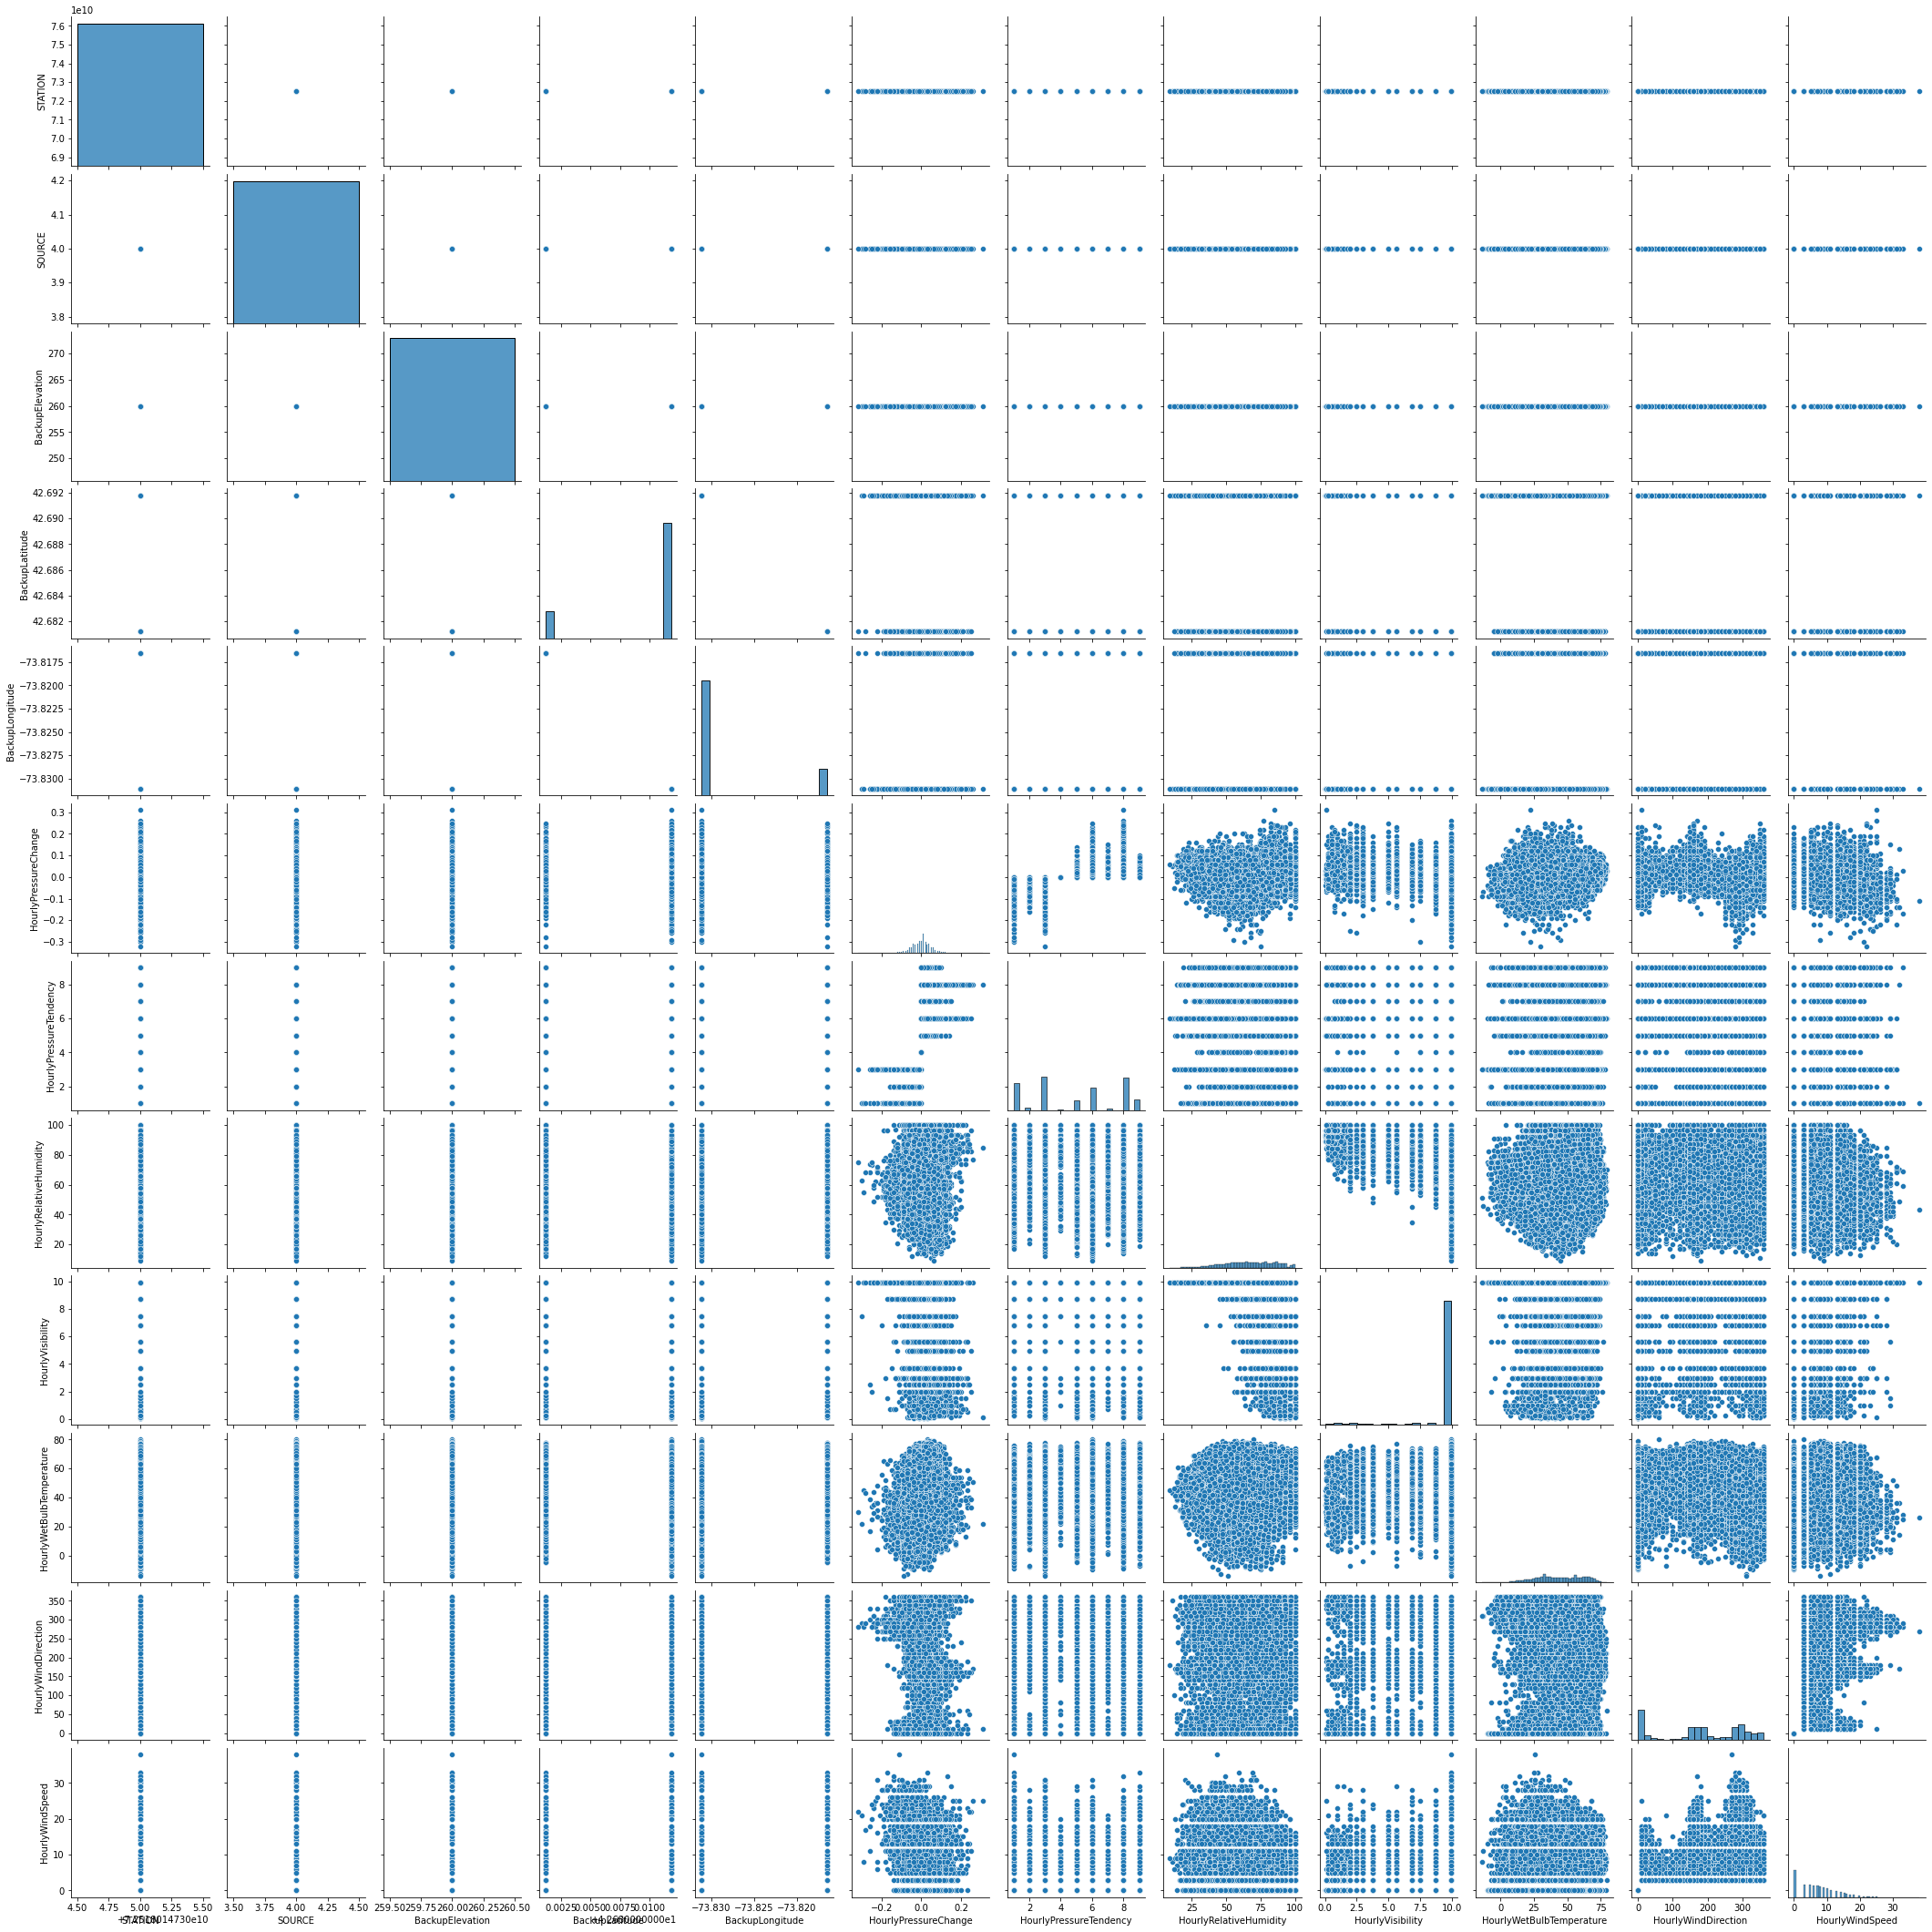

In [11]:
sns.pairplot(df)

In [12]:
df['DATE'] = pd.to_datetime(df['DATE'])

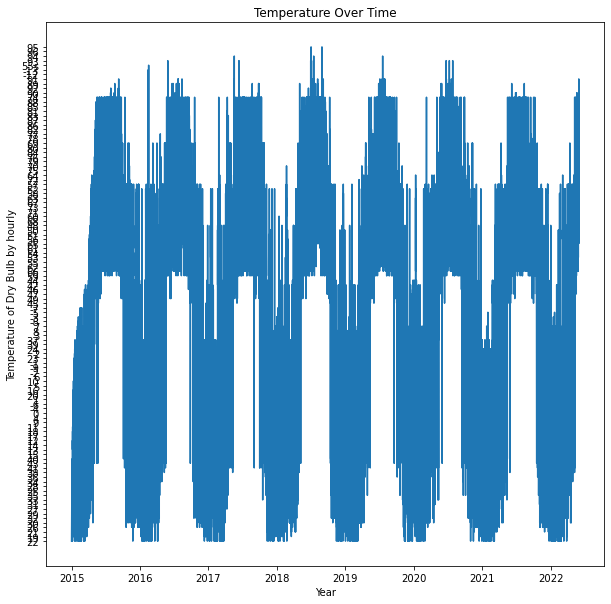

In [13]:
plt.figure(figsize=(10, 10))
plt.plot(df['DATE'], df['HourlyDryBulbTemperature'])
plt.title('Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature of Dry Bulb by hourly')
plt.show()

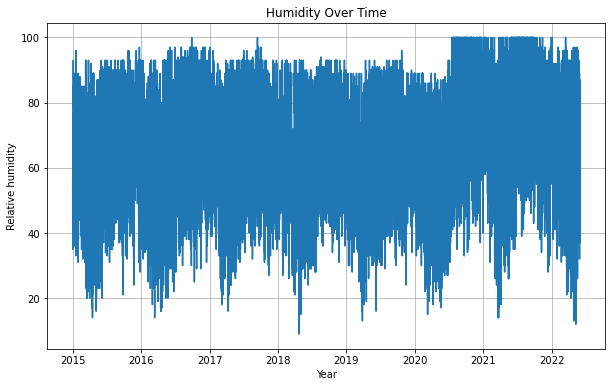

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['HourlyRelativeHumidity'])
plt.title('Humidity Over Time')
plt.xlabel('Year')
plt.ylabel('Relative humidity')
plt.grid(True)
plt.show()

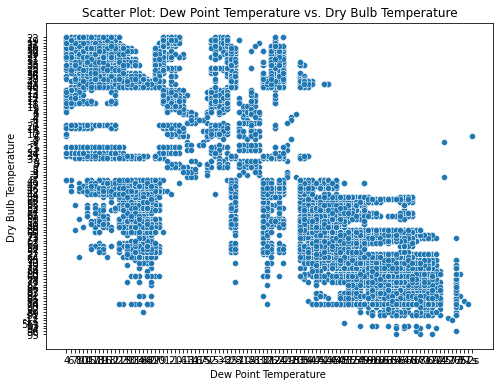

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['HourlyDewPointTemperature'], y=df['HourlyDryBulbTemperature'])
plt.title('Scatter Plot: Dew Point Temperature vs. Dry Bulb Temperature')
plt.xlabel('Dew Point Temperature ')
plt.ylabel('Dry Bulb Temperature ')
plt.show()

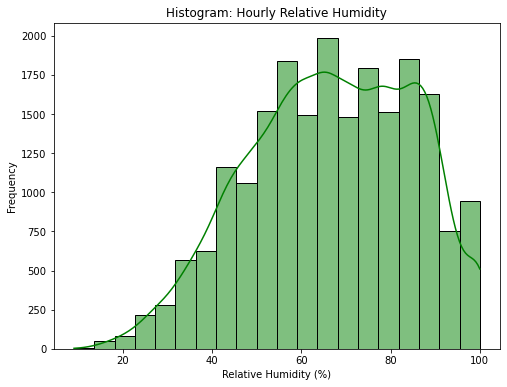

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['HourlyRelativeHumidity'], bins=20, kde=True, color='green')
plt.title('Histogram: Hourly Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.show()

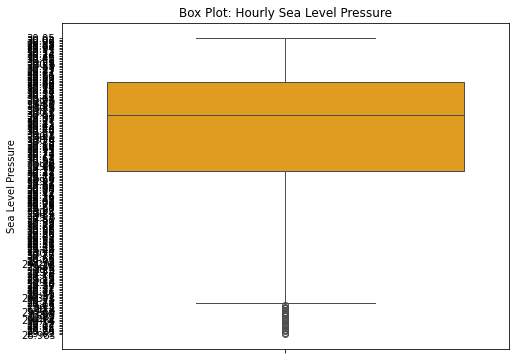

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['HourlySeaLevelPressure'], color='orange')
plt.title('Box Plot: Hourly Sea Level Pressure')
plt.ylabel('Sea Level Pressure')
plt.show()

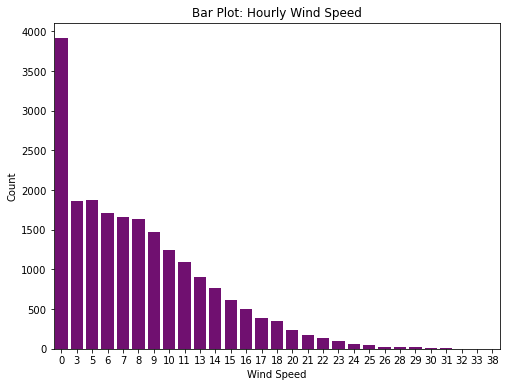

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['HourlyWindSpeed'].value_counts().index, y=df['HourlyWindSpeed'].value_counts(), color='purple')
plt.title('Bar Plot: Hourly Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Count')
plt.show()

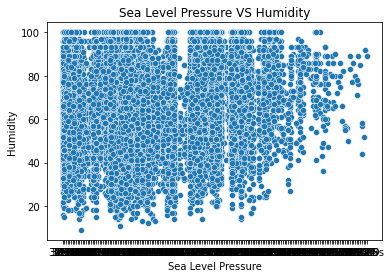

In [19]:
sns.scatterplot(x=df['HourlySeaLevelPressure'], y=df['HourlyRelativeHumidity'])
plt.title("Sea Level Pressure VS Humidity")
plt.xlabel("Sea Level Pressure")
plt.ylabel("Humidity")
plt.show()


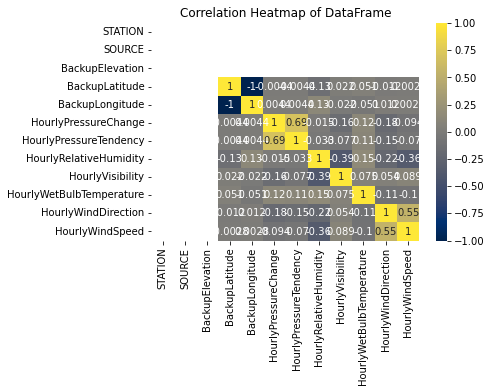

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='cividis')
plt.title('Correlation Heatmap of DataFrame')
plt.show()

In [21]:
df['HourlySeaLevelPressure'] = pd.to_numeric(df['HourlySeaLevelPressure'], errors='coerce')
df.dropna(subset=['HourlySeaLevelPressure'], inplace=True)

In [22]:
numeric_columns = ['HourlyRelativeHumidity', 'HourlyWindSpeed', 'HourlyDryBulbTemperature']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=numeric_columns, inplace=True)

In [23]:
X = df[['HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyWindSpeed']]
y = df['HourlyDryBulbTemperature']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
print(X.shape, X_train.shape, X_test.shape)

(20837, 3) (16669, 3) (4168, 3)


In [26]:
print(y.shape, y_train.shape, y_test.shape)

(20837,) (16669,) (4168,)


In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 15.555662539809


In [31]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 337.00754246430864


In [32]:
# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 18.357765181642037


In [33]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.10783349544317034


In [34]:
actual_predict = pd.DataFrame({'Actual values': y_test.values.flatten(), 'Predicted values': y_pred.flatten()})
actual_predict.head()

,Actual values,Predicted values
0,35.0,47.885124
1,72.0,52.614408
2,30.0,44.532049
3,27.0,44.480654
4,28.0,45.024647
